#### importing the required libraries 

In [5]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras import Sequential 
from keras.layers import Dense 
from keras.optimizers import SGD 
from keras.regularizers import L1,L2 

#### importing the dataset 

In [6]:
df=pd.read_csv(r"D:\edu\INNO\Deep_Learning\Assignments\data\Multiple CSV\Multiple CSV\2.concerticcir1.csv",header=None)
df.head()

,0,1,2
0,-0.382891,-0.090840,1.0
1,-0.020962,-0.477874,1.0
2,-0.396116,-1.289427,0.0
3,-0.618130,-0.063837,1.0
4,0.703478,-0.187038,1.0


In [7]:
#renaming columns properly
df.columns=["feature_1","feature_2","label"] 
df.head() 

,feature_1,feature_2,label
0,-0.382891,-0.090840,1.0
1,-0.020962,-0.477874,1.0
2,-0.396116,-1.289427,0.0
3,-0.618130,-0.063837,1.0
4,0.703478,-0.187038,1.0


#### checking label counts 

In [8]:
df["label"].value_counts()

label
1.0    50
0.0    50
Name: count, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature_1  100 non-null    float64
 1   feature_2  100 non-null    float64
 2   label      100 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB


<Axes: xlabel='feature_1', ylabel='feature_2'>

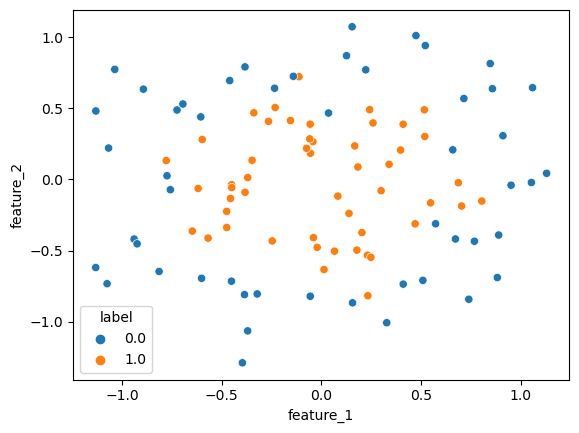

In [10]:
sns.scatterplot(data=df,x="feature_1",y="feature_2",hue="label") 

#### splitting the data into input and output features as x and y 

In [20]:
## splitting the data into input and output
x=df[["feature_1","feature_2"]]

## typecasting label column as int 
y=df["label"].astype(int)

In [21]:
y.head()

0    1
1    1
2    0
3    1
4    1
Name: label, dtype: int32

#### splitting the data into train and test 

In [22]:
X_train,X_test,y_train,y_test=train_test_split(x,y,train_size=0.9)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(90, 2) (90,)
(10, 2) (10,)


#### scaling the input features of both X_train,X_test 

In [23]:
scalar=StandardScaler()

### scaling X_train
X_train=scalar.fit_transform(X_train)



## scaling X_test 
X_test=scalar.transform(X_test)

#### building the logical structure 

In [122]:
model=Sequential()
model.add(Dense(18,activation="relu",kernel_regularizer=L1(0.001),bias_regularizer=L1(0.001),input_dim=2))

model.add(Dense(8,activation="relu",kernel_regularizer=L1(0.001),bias_regularizer=L1(0.001)))
model.add(Dense(1,activation="sigmoid"))


In [123]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 18)                54        
                                                                 
 dense_34 (Dense)            (None, 8)                 152       
                                                                 
 dense_35 (Dense)            (None, 1)                 9         
                                                                 
Total params: 215 (860.00 Byte)
Trainable params: 215 (860.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### compiling the model 

In [124]:
model.compile(loss="binary_crossentropy",optimizer=SGD(0.01),metrics=["accuracy"])
history=model.fit(X_train,y_train,batch_size=10,epochs=400,validation_split=0.1)

Epoch 1/400
9/9 [==============================] - 1s 40ms/step - loss: 0.7622 - accuracy: 0.4815 - val_loss: 0.7533 - val_accuracy: 0.5556
Epoch 2/400
9/9 [==============================] - 0s 10ms/step - loss: 0.7599 - accuracy: 0.4938 - val_loss: 0.7566 - val_accuracy: 0.5556
Epoch 3/400
9/9 [==============================] - 0s 10ms/step - loss: 0.7572 - accuracy: 0.4568 - val_loss: 0.7547 - val_accuracy: 0.5556
Epoch 4/400
9/9 [==============================] - 0s 8ms/step - loss: 0.7556 - accuracy: 0.4815 - val_loss: 0.7509 - val_accuracy: 0.5556
Epoch 5/400
9/9 [==============================] - 0s 8ms/step - loss: 0.7535 - accuracy: 0.4815 - val_loss: 0.7435 - val_accuracy: 0.5556
Epoch 6/400
9/9 [==============================] - 0s 8ms/step - loss: 0.7507 - accuracy: 0.4938 - val_loss: 0.7395 - val_accuracy: 0.5556
Epoch 7/400
9/9 [==============================] - 0s 8ms/step - loss: 0.7484 - accuracy: 0.5062 - val_loss: 0.7440 - val_accuracy: 0.5556
Epoch 8/400
9/9 [=======

9/9 [==============================] - 0s 8ms/step - loss: 0.5900 - accuracy: 0.8765 - val_loss: 0.6706 - val_accuracy: 0.6667
Epoch 118/400
9/9 [==============================] - 0s 8ms/step - loss: 0.5879 - accuracy: 0.8642 - val_loss: 0.6777 - val_accuracy: 0.6667
Epoch 119/400
9/9 [==============================] - 0s 10ms/step - loss: 0.5855 - accuracy: 0.8765 - val_loss: 0.6842 - val_accuracy: 0.5556
Epoch 120/400
9/9 [==============================] - 0s 10ms/step - loss: 0.5829 - accuracy: 0.8765 - val_loss: 0.6915 - val_accuracy: 0.4444
Epoch 121/400
9/9 [==============================] - 0s 9ms/step - loss: 0.5807 - accuracy: 0.8765 - val_loss: 0.7030 - val_accuracy: 0.4444
Epoch 122/400
9/9 [==============================] - 0s 10ms/step - loss: 0.5790 - accuracy: 0.8765 - val_loss: 0.7107 - val_accuracy: 0.4444
Epoch 123/400
9/9 [==============================] - 0s 10ms/step - loss: 0.5776 - accuracy: 0.8519 - val_loss: 0.7180 - val_accuracy: 0.4444
Epoch 124/400
9/9 [====

9/9 [==============================] - 0s 10ms/step - loss: 0.4639 - accuracy: 0.9383 - val_loss: 0.6518 - val_accuracy: 0.6667
Epoch 176/400
9/9 [==============================] - 0s 10ms/step - loss: 0.4633 - accuracy: 0.9136 - val_loss: 0.6245 - val_accuracy: 0.6667
Epoch 177/400
9/9 [==============================] - 0s 10ms/step - loss: 0.4602 - accuracy: 0.9259 - val_loss: 0.6257 - val_accuracy: 0.6667
Epoch 178/400
9/9 [==============================] - 0s 11ms/step - loss: 0.4582 - accuracy: 0.9259 - val_loss: 0.6139 - val_accuracy: 0.6667
Epoch 179/400
9/9 [==============================] - 0s 11ms/step - loss: 0.4562 - accuracy: 0.9383 - val_loss: 0.6248 - val_accuracy: 0.6667
Epoch 180/400
9/9 [==============================] - 0s 10ms/step - loss: 0.4536 - accuracy: 0.9136 - val_loss: 0.6152 - val_accuracy: 0.6667
Epoch 181/400
9/9 [==============================] - 0s 11ms/step - loss: 0.4526 - accuracy: 0.9259 - val_loss: 0.6318 - val_accuracy: 0.6667
Epoch 182/400
9/9 [=

9/9 [==============================] - 0s 10ms/step - loss: 0.3643 - accuracy: 0.9383 - val_loss: 0.5972 - val_accuracy: 0.7778
Epoch 234/400
9/9 [==============================] - 0s 10ms/step - loss: 0.3626 - accuracy: 0.9383 - val_loss: 0.5733 - val_accuracy: 0.7778
Epoch 235/400
9/9 [==============================] - 0s 10ms/step - loss: 0.3611 - accuracy: 0.9506 - val_loss: 0.5520 - val_accuracy: 0.7778
Epoch 236/400
9/9 [==============================] - 0s 8ms/step - loss: 0.3589 - accuracy: 0.9506 - val_loss: 0.5560 - val_accuracy: 0.7778
Epoch 237/400
9/9 [==============================] - 0s 8ms/step - loss: 0.3584 - accuracy: 0.9506 - val_loss: 0.5606 - val_accuracy: 0.7778
Epoch 238/400
9/9 [==============================] - 0s 8ms/step - loss: 0.3565 - accuracy: 0.9506 - val_loss: 0.5671 - val_accuracy: 0.7778
Epoch 239/400
9/9 [==============================] - 0s 8ms/step - loss: 0.3551 - accuracy: 0.9506 - val_loss: 0.5746 - val_accuracy: 0.7778
Epoch 240/400
9/9 [=====

9/9 [==============================] - 0s 11ms/step - loss: 0.3044 - accuracy: 0.9506 - val_loss: 0.5013 - val_accuracy: 0.7778
Epoch 292/400
9/9 [==============================] - 0s 9ms/step - loss: 0.3050 - accuracy: 0.9506 - val_loss: 0.4886 - val_accuracy: 0.7778
Epoch 293/400
9/9 [==============================] - 0s 8ms/step - loss: 0.3054 - accuracy: 0.9506 - val_loss: 0.4861 - val_accuracy: 0.7778
Epoch 294/400
9/9 [==============================] - 0s 9ms/step - loss: 0.3046 - accuracy: 0.9383 - val_loss: 0.5013 - val_accuracy: 0.7778
Epoch 295/400
9/9 [==============================] - 0s 8ms/step - loss: 0.3022 - accuracy: 0.9383 - val_loss: 0.5081 - val_accuracy: 0.7778
Epoch 296/400
9/9 [==============================] - 0s 9ms/step - loss: 0.3025 - accuracy: 0.9383 - val_loss: 0.5426 - val_accuracy: 0.7778
Epoch 297/400
9/9 [==============================] - 0s 10ms/step - loss: 0.3004 - accuracy: 0.9506 - val_loss: 0.5448 - val_accuracy: 0.7778
Epoch 298/400
9/9 [======

#### plotting the train test loss 

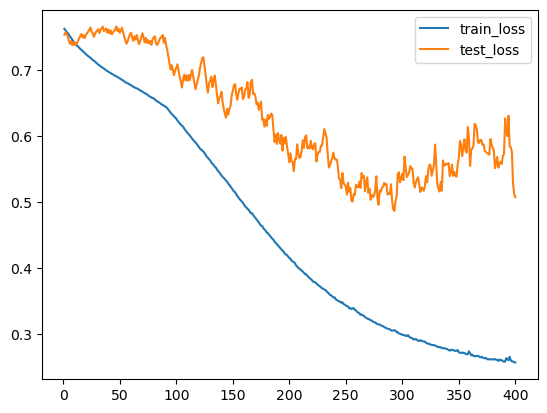

In [125]:
plt.plot(range(1,401),history.history["loss"],label="train_loss")
plt.plot(range(1,401),history.history["val_loss"],label="test_loss") 
plt.legend() 

#### finding the predicted values using model 

In [126]:
predicted=model.predict(X_test)
predicted

1/1 [==============================] - 0s 95ms/step


array([[0.9757806 ],
       [0.07154357],
       [0.0981289 ],
       [0.01664246],
       [0.11519326],
       [0.16982739],
       [0.92466676],
       [0.67437893],
       [0.9835467 ],
       [0.19840997]], dtype=float32)

#### converting the predicted probablities to the respective labels

In [127]:
predicted=np.where(predicted>0.5,1,0)
predicted 

array([[1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])

#### evaluating the model 

0.9


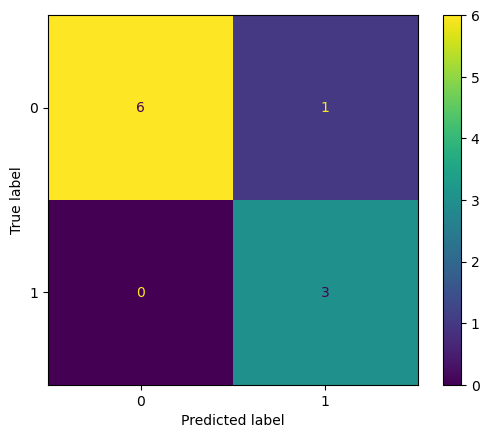

In [128]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
print(accuracy_score(y_test,predicted))
cm=confusion_matrix(y_test,predicted)
va=ConfusionMatrixDisplay(cm)
va.plot() 
plt.show() 

#### creating the decision surface 

In [129]:
from mlxtend.plotting  import plot_decision_regions


9600/9600 [==============================] - 20s 2ms/step


<Axes: >

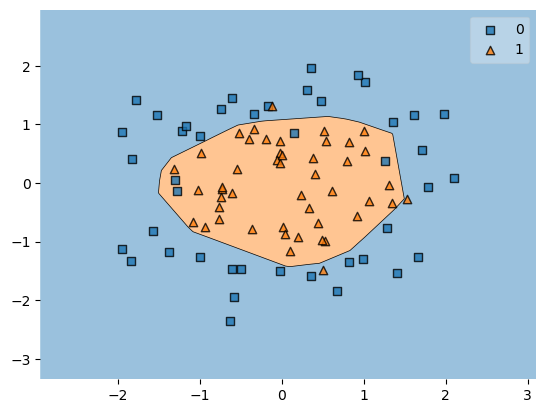

In [130]:
plot_decision_regions(X_train,y_train.values,clf=model)

9600/9600 [==============================] - 20s 2ms/step


<Axes: >

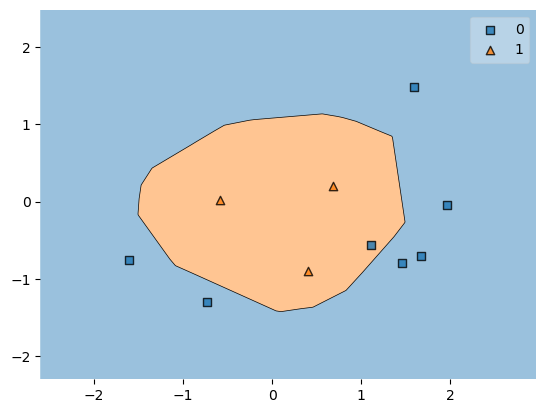

In [131]:
#for test data 
plot_decision_regions(X_test,y_test.values,clf=model)

#### Model Summary 


- This neural network model is showing accuracy of 90 percent
- We have used 2 hidden layers.
- In the First Hidden layers we have used 18 neurons,activation function as relu and kernel and bias regularizer L1 as 0.001.
- In the second hidden layers we have used 8 neurons,activation function as relu and kernel and bias regularizer L1 as 0.001.
- In the output layer we have used sigmoid as the activation function. 
- For compiling the model we haved loss as binary cross entropy,optimizer as SGD with batch size of 10 with learning rate of 0.01. 
- No of epochs used for training this model is 400.